### Packt > 
# The Data Analysis Workshop


## 1. Bike Sharing Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/'
hourly_data = pd.read_csv(data_path + 'Chapter01/data/hour.csv')

In [3]:
print(f'Shape of data: {hourly_data.shape}')
print(f'Number of missing values in the data: {hourly_data.isnull().sum().sum()}')

Shape of data: (17379, 17)
Number of missing values in the data: 0


In [4]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
preprocessed_data = hourly_data.copy()

In [6]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [7]:
# transform years
years_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: years_mapping[x])

In [8]:
# transform weekdays
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [9]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [10]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67

In [11]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [12]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
message will be output if condition is False
"""

assert(preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),\
'Sum of casual and registered rides not equal to total number of rides'

/Users/April/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/April/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


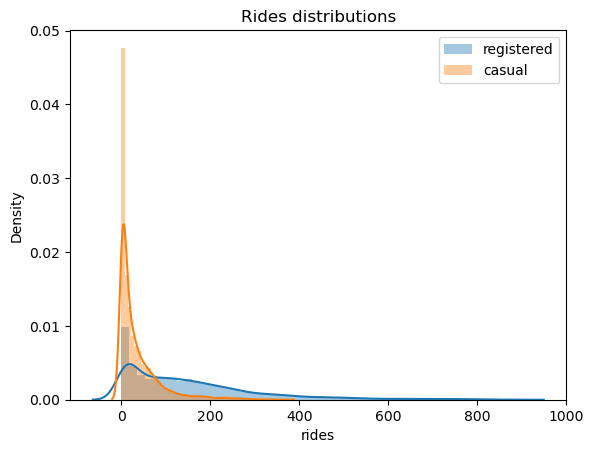

In [13]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data.registered, label='registered')
sns.distplot(preprocessed_data.casual, label='casual')
plt.legend()
plt.xlabel('rides')
plt.title('Rides distributions')
plt.savefig('figs/rides_distributions.png', format='png')

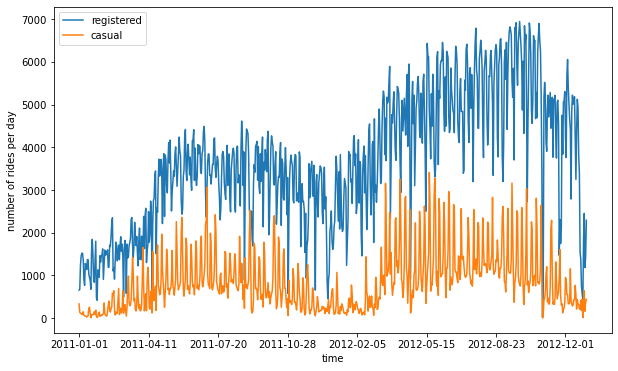

In [14]:
# plot evolution of rides over time

# take a subset of the DS
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]

# group the data by the date and sum the single entries for registered and casual columns
plot_data = plot_data.groupby('dteday').sum()

# ax - a graph object
ax = plot_data.plot(figsize=(10, 6))

ax.set_xlabel('time')
ax.set_ylabel('number of rides per day')
plt.savefig('figs/rides_daily.png', format='png')

# the number of registered rides is always above and significantly higher than the number of casual rides per day
# during winter, the overall number of rides decreases

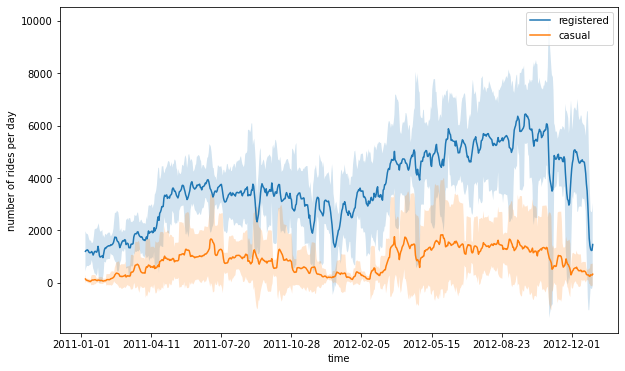

In [15]:
# One way to smooth out the curves is to take the rolling mean and standard deviation 
# of the two time series and plot those instead. 
# In this way, we can visualize not only the average number of rides for a specific time period 
# (also known as a window) but also the expected deviation from the mean

# the value of the rolling mean (or the standard deviation) at a certain time instance 
# is only computed from the last window entries in the time series (in our case, this is 7), 
# and not from the entries of the whole series

# take a subset of data
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]

# group by date and sum the values of registered and casual rides per day
plot_data = plot_data.groupby('dteday').sum()

# define window for computing the rolling mean and standard deviation
window = 7

# rolling means and rolling standard deviation
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# create a plot of rolling means
ax = rolling_means.plot(figsize=(10, 6))

# caluculate the deviation boundaries for registered and casual rides
registered_top_boundary = rolling_means.registered + 2 * rolling_deviations.registered
registered_bottom_boundary = rolling_means.registered - 2 * rolling_deviations.registered

casual_top_boundary = rolling_means.casual + 2 * rolling_deviations.casual
casual_bottom_boundary = rolling_means.casual - 2 * rolling_deviations.casual

# color the zone between the series of rolling means +- 2 rolling standard deviations, alpha - opacity
ax.fill_between(rolling_means.index, registered_top_boundary, registered_bottom_boundary, alpha=0.2)
ax.fill_between(rolling_means.index, casual_top_boundary, casual_bottom_boundary, alpha=0.2)

ax.set_xlabel('time')
ax.set_ylabel('number of rides per day')

plt.savefig('figs/rides_aggregated.png', format='png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


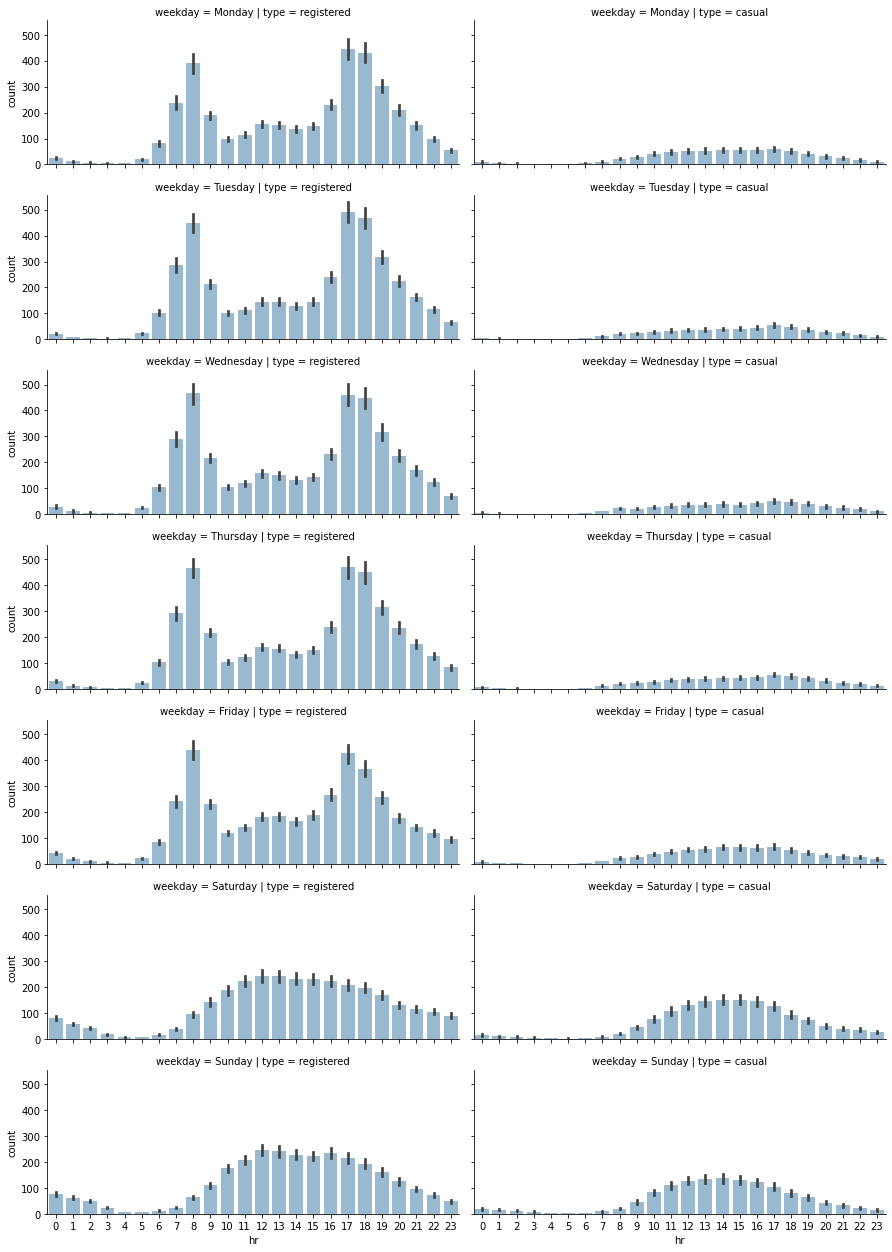

In [16]:
# check the distributions over separate hours and days of the week

# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data: count the number of entries of registered and casual rides 
# for each distinct hour and weekday
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

#
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5,
                    row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='png')

In [17]:
preprocessed_data['weekday'].value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

In [18]:
preprocessed_data[preprocessed_data['weekday']=='Friday']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
138,139,2011-01-07,winter,2011,1,0,0,Friday,1,cloudy,0.20,0.1970,64.0,12.9980,4,13,17
139,140,2011-01-07,winter,2011,1,1,0,Friday,1,cloudy,0.20,0.1970,69.0,15.0013,2,5,7
140,141,2011-01-07,winter,2011,1,2,0,Friday,1,cloudy,0.20,0.1970,69.0,15.0013,0,1,1
141,142,2011-01-07,winter,2011,1,4,0,Friday,1,cloudy,0.20,0.2121,69.0,8.9981,0,1,1
142,143,2011-01-07,winter,2011,1,5,0,Friday,1,light_rain_snow,0.22,0.2727,55.0,0.0000,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,17303,2012-12-28,winter,2012,12,19,0,Friday,1,cloudy,0.24,0.2273,65.0,12.9980,15,113,128
17303,17304,2012-12-28,winter,2012,12,20,0,Friday,1,cloudy,0.24,0.2576,65.0,7.0015,14,83,97
17304,17305,2012-12-28,winter,2012,12,21,0,Friday,1,cloudy,0.24,0.2424,70.0,8.9981,17,75,92
17305,17306,2012-12-28,winter,2012,12,22,0,Friday,1,cloudy,0.24,0.2576,70.0,6.0032,13,49,62


In [19]:
plot_data[plot_data['weekday']=='Friday']

,hr,weekday,type,count
138,0,Friday,registered,13
139,1,Friday,registered,5
140,2,Friday,registered,1
141,4,Friday,registered,1
142,5,Friday,registered,5
...,...,...,...,...
34681,19,Friday,casual,15
34682,20,Friday,casual,14
34683,21,Friday,casual,17
34684,22,Friday,casual,13


In [20]:
plot_data[plot_data['weekday']=='Friday']['count'].max()

757

In [21]:
plot_data[plot_data['weekday']=='Friday']['count'].mean()

98.06795335745879

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


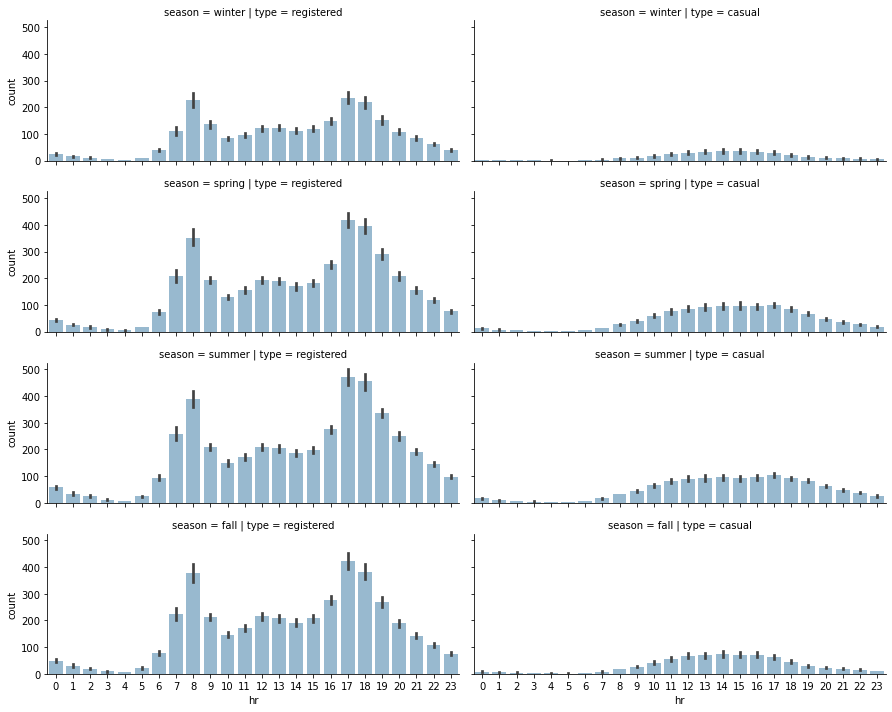

In [22]:
# check the distributions over separate hours and days of the week depending on seasons

plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5,
                    row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/exercise_1_02_a.png', format='png')

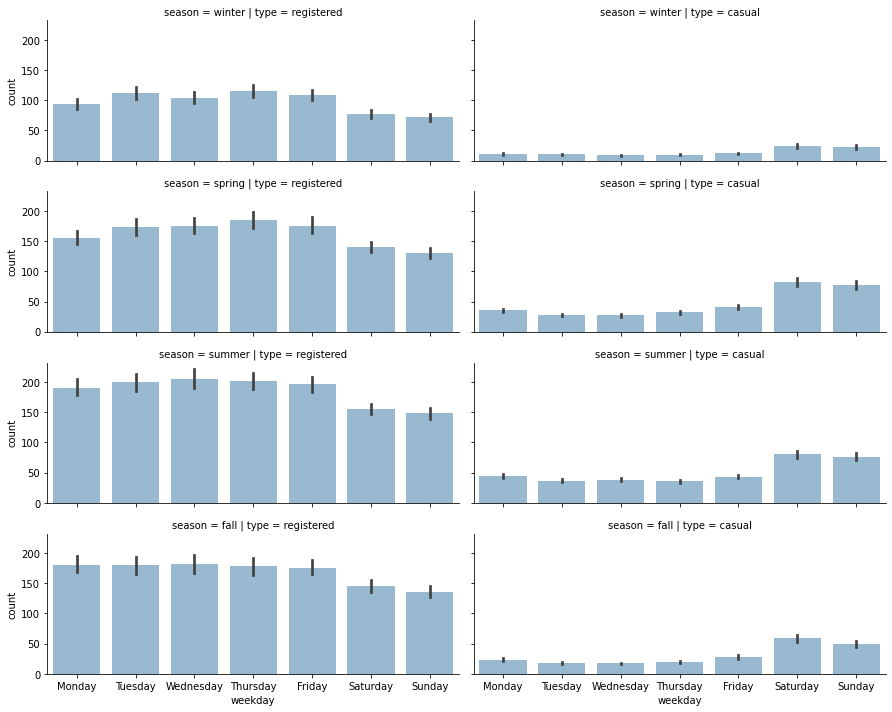

In [23]:
# check the distributions over weekdays depending on seasons

plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5,
                    row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,
        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
grid.savefig('figs/exercise_1_02_a.png', format='png')

### Hypothesis testing

In [24]:
population_mean = preprocessed_data.registered.mean()

In [25]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == 'summer') & (preprocessed_data.yr == 2011)].registered

In [26]:
# perform t-test and compute p-value

from scipy.stats import ttest_1samp

test_result = ttest_1samp(sample, population_mean)
print(f'Test statistics: {test_result[0]}, p-value: {test_result[1]}')

Test statistics: -3.491969148378619, p-value: 0.0004887645279519517


In [27]:
# get sample as 5% of the full data

import random

random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f'Test statistics: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}')

Test statistics: 1.9686162767567477, p-value: 0.04931500088074554


In [28]:
# our null hypothesis is that the average number of rides for registered users 
# during working days is the same as the average number of rides during the weekend

# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingday_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingday_mask]

In [29]:
preprocessed_data[weekend_mask]['weekday'].value_counts()

Saturday    2512
Sunday      2502
Name: weekday, dtype: int64

In [30]:
preprocessed_data[workingday_mask]['weekday'].value_counts()

Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

In [31]:
# perform ttest

from scipy.stats import ttest_ind

test_res = ttest_ind(weekend_data, workingdays_data)
print(f'Statistics value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}')

# The resulting p-value from this test is less than 0.0001, which is far below the standard critical 0.05 value. 
# conclusion: there is a statistically significant difference between the number of rides
# performed during working days and the weekend.

Statistics value: -16.004, p-value: 0.000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


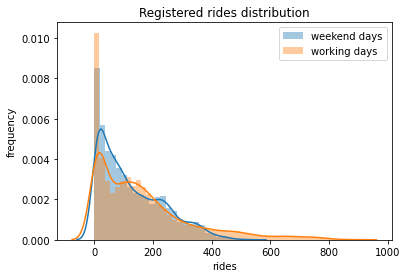

In [32]:
# plot the distributions of two samples

sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title('Registered rides distribution')
plt.savefig('figs/exercise_1_04_a.png', format='png')

Statistics value: 41.077, p-value: 0.000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


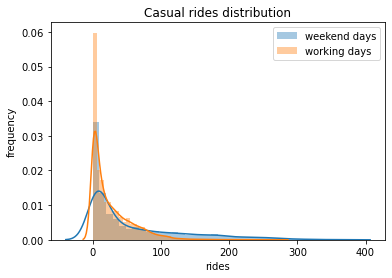

In [33]:
# let's check the hypothesis: casual users perform more rides during the weekend
# the null hypothesis is that the average number of rides during working days is the same as 
# the average number of rides during the weekend, both performed only by casual customers

# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingday_mask]

test_res = ttest_ind(weekend_data, workingdays_data)
print(f'Statistics value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}')

sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title('Casual rides distribution')
plt.savefig('figs/exercise_1_04_a.png', format='png')

# the p-value is 0, which is strong evidence against the null hypothesis.

**In conclusion, we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and registered customers**

### Analysis of Weather-Related Features

In [34]:
# let's check the correlation between weather-related features and the variables of interest
# weathersit: clear/cloudy/light_rain_snow/heavy_rain_snow
# temp: the normalized temperature in Celsius
# atemp: the normalized feeling temperature in Celsius
# hum: the humidity level as a percentage
# the wind speed in m/s

def plot_correlations(data, col):
    # get corr between col and registered rides
    corr_r = np.corrcoef(data[col], data.registered)[0, 1]
    ax = sns.regplot(x=col, y='registered', data=data, scatter_kws={'alpha':0.05},
                     label=f'Registered rides (correlation {corr_r:.3f})')
    # get corr between col and casual rides
    corr_r = np.corrcoef(data[col], data.casual)[0, 1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={'alpha':0.05},
                     label=f'Casual rides (correlation {corr_r:.3f})')
    
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha = (0.05)
    ax.set_ylabel('rides')
    ax.set_title(f'Correlation between rides and {col}')
    return ax

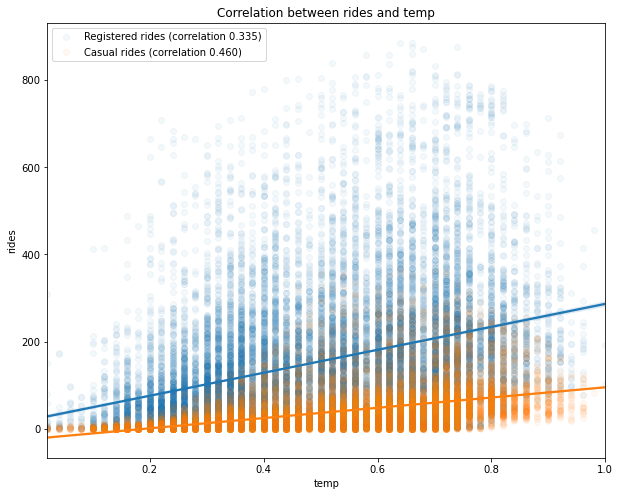

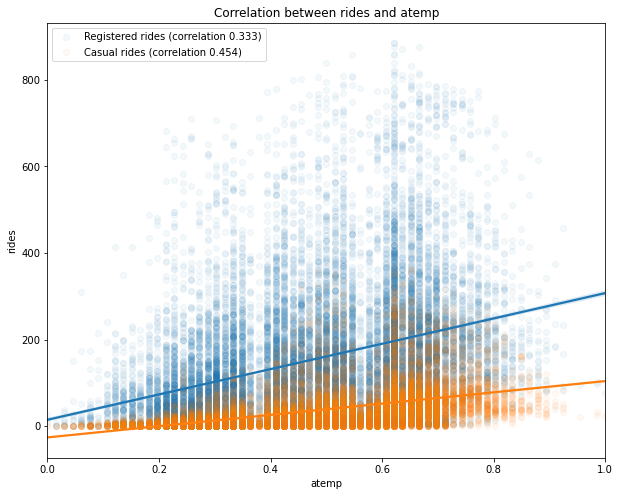

In [35]:
# applying the defined function return the figures

plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig('figs/correlation_temp.png', format='png')


plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('figs/correlation_temp.png', format='png')

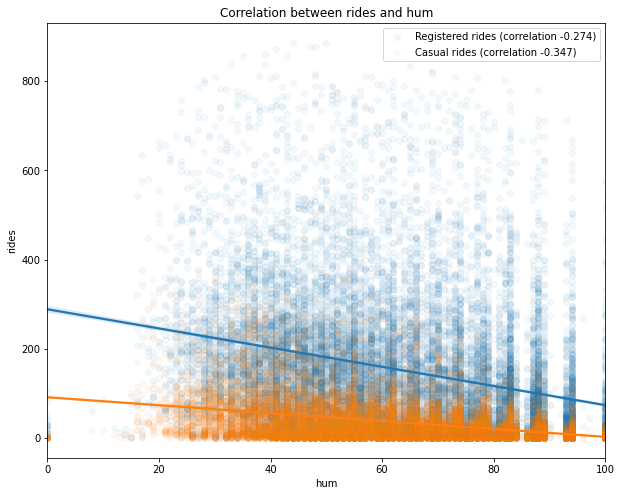

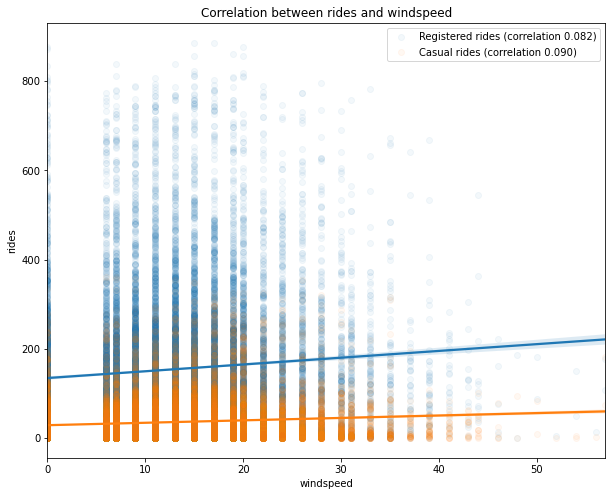

In [36]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig('figs/correlation_temp.png', format='png')


plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig('figs/correlation_temp.png', format='png')

In [37]:
# the Difference between the Pearson and Spearman Correlations
# the Pearson correlation - a linear relationship between the two variables is assumed
# the Spearman correlation - only a monotonic relationship is required

# define random variables
x = np.linspace(0, 5, 100)
y_lin = 0.5 * x + 0.1 * np.random.randn(100)
y_mon = np.exp(x) + 0.1 * np.random.randn(100) 

In [38]:
# compute correlations
from scipy.stats import pearsonr, spearmanr

corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_lin)[0]

# both functions return a two-dimensional array in which the first value is the respective correlation, 
# while the second one is the p-value of a hypothesis test in which the null hypothesis assumes 
# that the computed correlation is equal to zero

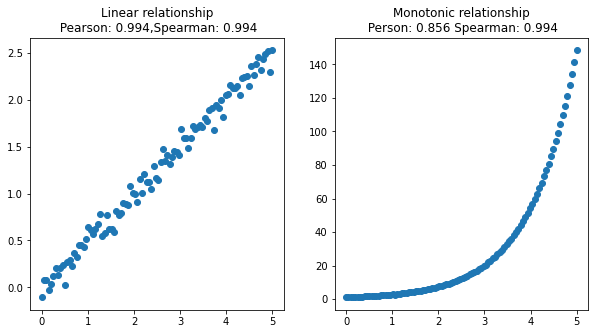

In [39]:
# visualize variables

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x, y_lin)
ax1.set_title(f'Linear relationship\n \
Pearson: {corr_lin_pearson:.3f},\
Spearman: {corr_lin_spearman:.3f}')
ax2.scatter(x, y_mon)
ax2.set_title(f'Monotonic relationship\n \
Person: {corr_mon_pearson:.3f} \
Spearman: {corr_mon_spearman:.3}')
fig.savefig('figs/exercise_1_05.png', format='png')

In [40]:
# define function for computing correlation

def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data['registered'])[0]
    spearman_reg = spearmanr(data[col], data['registered'])[0]
    pearson_cas = pearsonr(data[col], data['casual'])[0]
    spearman_cas = spearmanr(data[col], data['casual'])[0]
    return pd.Series({'Pearson (registered)': pearson_reg, 'Spearman (registered)': spearman_reg,
                     'Pearson (casual)': pearson_cas, 'Spearman (casual)': spearman_cas})

In [41]:
# compute correlation measures between different features

cols =['temp', 'atemp', 'hum', 'windspeed']
corr_data = pd.DataFrame(index=['Pearson (registered)', 'Spearman (registered)', 
                                'Pearson (casual)', 'Spearman (casual)'])
for col in cols:
    corr_data[col] = compute_correlations(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


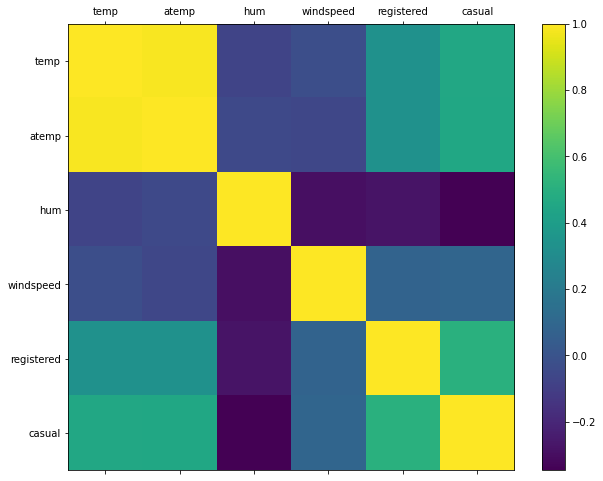

In [42]:
# correlation matrix plot

cols = ['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual']
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
fig.savefig('figs/correlations.png', format='png')

### Time Series Analysis

In [43]:
# define function for plotting rolling statistics and ADF (augmented Dickey-Fuller) test for the time series

from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f'Dickey-Fuller p-value: {p_val:.3f}')

In [44]:
# get daily rides
daily_rides = preprocessed_data[['dteday', 'registered', 'casual']]
daily_rides = daily_rides.groupby('dteday').sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

<Figure size 432x288 with 0 Axes>

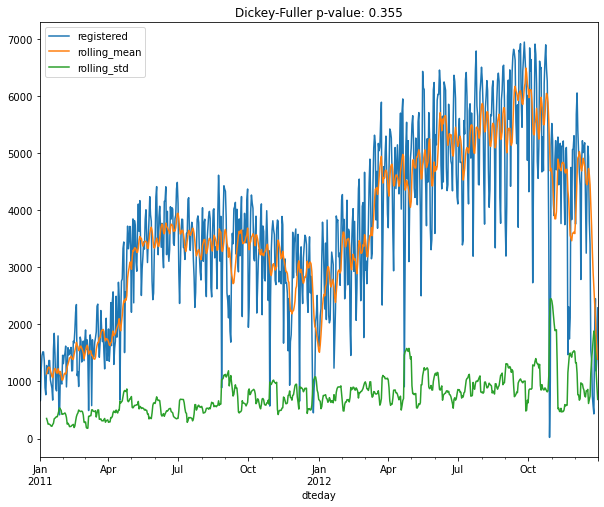

In [45]:
plt.figure()
test_stationarity(daily_rides['registered'], figsize=(10, 8))
plt.savefig('figs/daily_registered_original.png', format='png')

<Figure size 432x288 with 0 Axes>

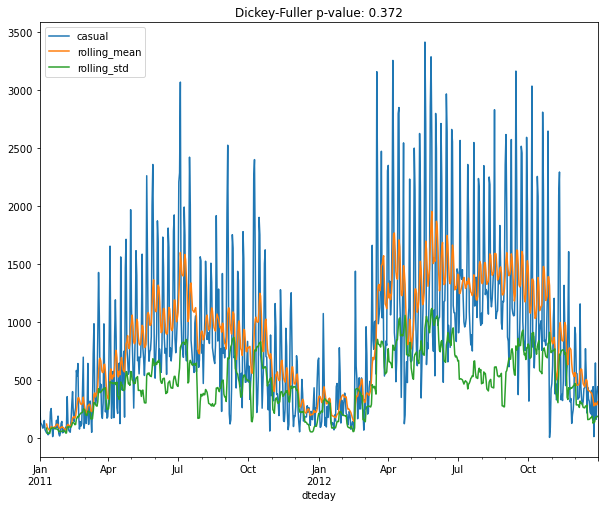

In [46]:
plt.figure()
test_stationarity(daily_rides['casual'], figsize=(10, 8))
plt.savefig('figs/daily_casual_original.png', format='png')

From the performed tests, we can see that neither the moving average nor standard deviations are stationary. 
Furthermore, the Dickey-Fuller test returns values of 0.355 and 0.372 for the registered and casual columns, 
respectively. This is strong evidence that the time series is not stationary, and we need to process them 
in order to obtain a stationary one.

A common way to detrend a time series and make it stationary is to subtract either its rolling mean
or its last value, or to decompose it into a component that will contain its trend, seasonality, 
and residual components.

In [47]:
 # let's first check whether the time series is stationary by subtracting their rolling means and last values

registered = daily_rides['registered']
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)
casual = daily_rides['casual']
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

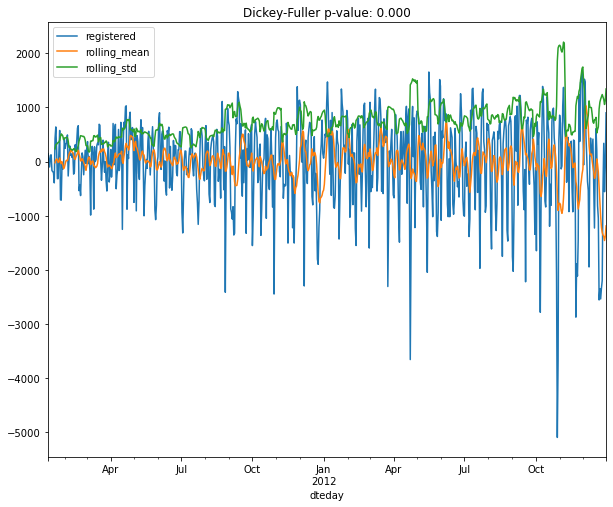

In [48]:
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))
plt.savefig('figs/registered_ma_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

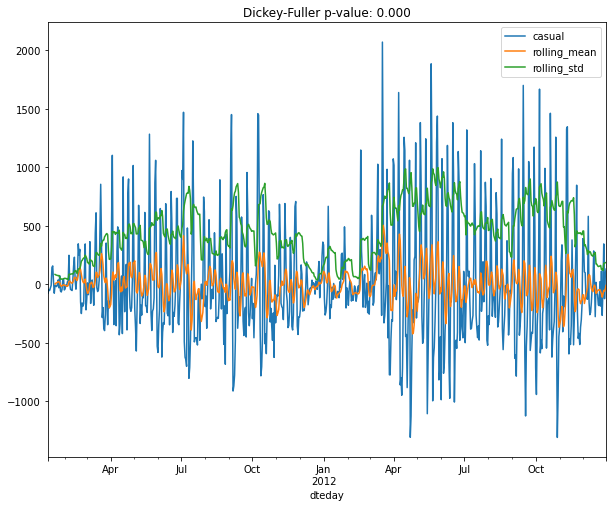

In [49]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))
plt.savefig('figs/casual_ma_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

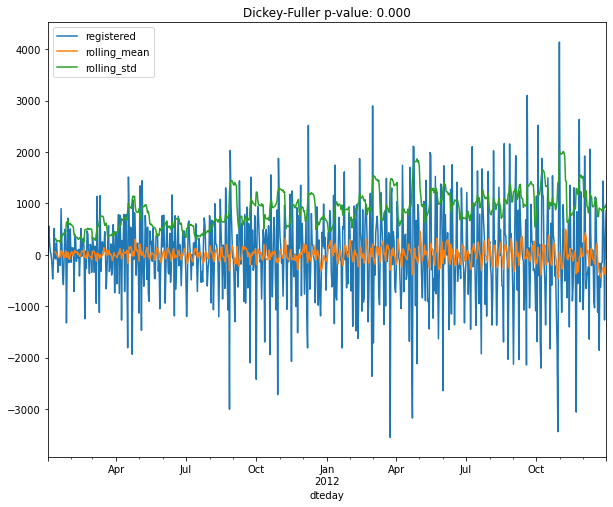

<Figure size 432x288 with 0 Axes>

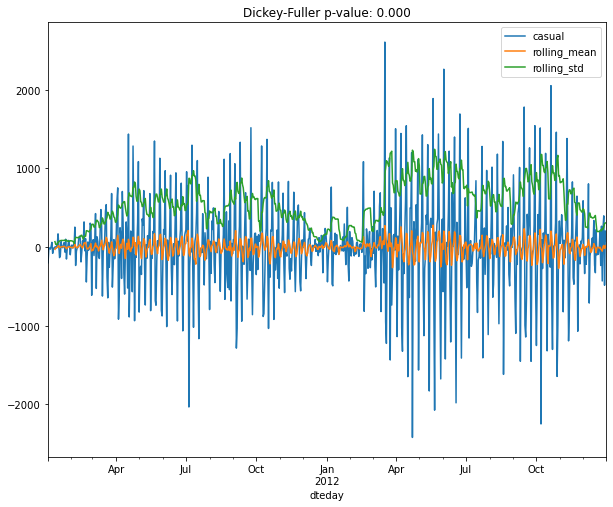

In [50]:
# subtracting the last value

registered = daily_rides['registered']
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)
casual = daily_rides['casual']
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)
plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
plt.savefig('figs/registered_diff.png', format='png')
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))
plt.savefig('figs/casual_diff.png', format='png')

Both of the techniques returned a time series, which is stationary, according to the Dickey-Fuller test.

###  Time series decomposition

This involves breaking the original time series into separate components:
- **Trend component**: This component represents a long-term progression of the series. A trend component is present when there is a persistent increase or decrease in the series.
- **Seasonal component**: This component represents seasonality patterns in the data. A seasonal component persists when the data is influenced by certain seasonal factors (for example, monthly, quarterly, or yearly factors).
- **Residual component**: This component represents an irregular or noisy component. This component describes random fluctuations in the data, which are not captured by the other components. In general, this is the residual of the time series, that is, once the other components have been removed.

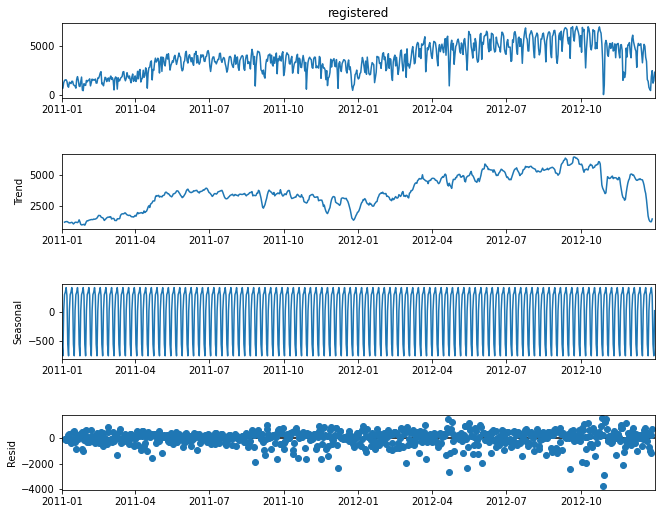

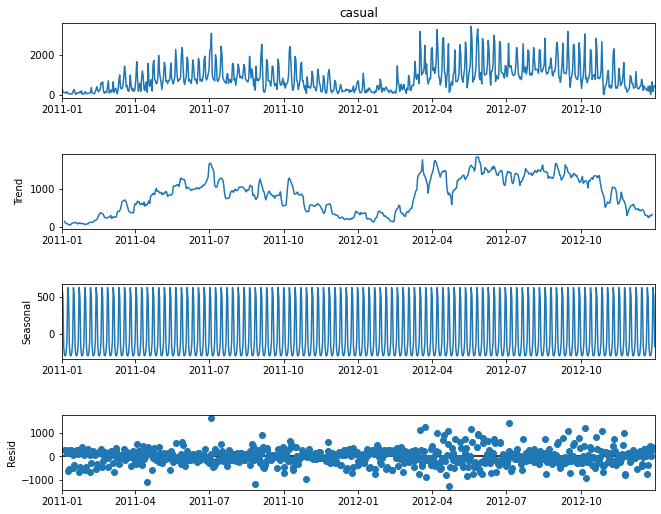

In [51]:
# decompose the number of rides into three separate components, trend, seasonal, and residual components

from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides['registered'])
casual_decomposition = seasonal_decompose(daily_rides['casual'])

# to access each of these three signals, use .trend, .seasonal, and .resid variables.

# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)
registered_plot.savefig('figs/registered_decomposition.png', format='png')
registered_plot.savefig('figs/casual_decomposition.png', format='png')

<Figure size 432x288 with 0 Axes>

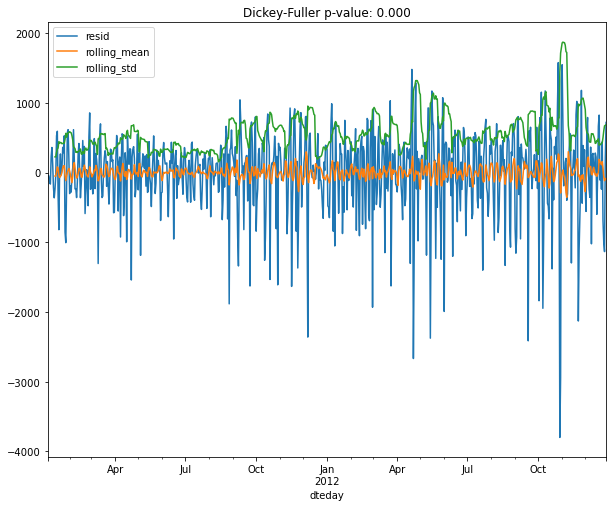

<Figure size 432x288 with 0 Axes>

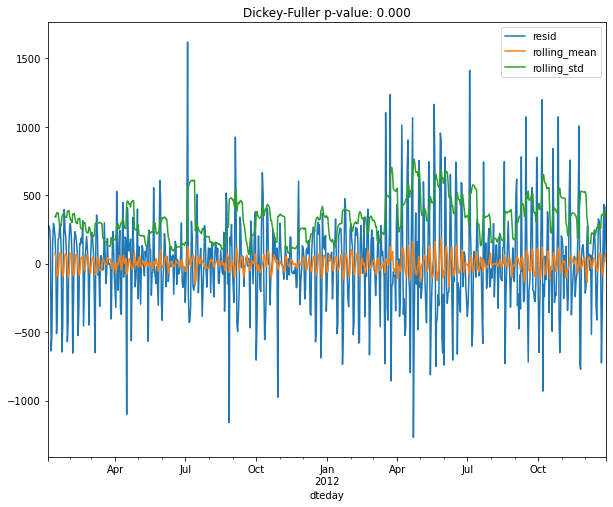

In [52]:
# test residuals for stationarity

plt.figure()
test_stationarity(registered_decomposition.resid.dropna(),figsize=(10, 8))
plt.savefig('figs/registered_resid.png', format='png')
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(),figsize=(10, 8))
plt.savefig('figs/casual_resid.png', format='png')

# As you can see, the residuals satisfy our stationary test.

In [53]:
preprocessed_data.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,0,1,1
5,6,2011-01-01,winter,2011,1,5,0,Saturday,0,cloudy,0.24,0.2576,75.0,6.0032,0,1,1
6,7,2011-01-01,winter,2011,1,6,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,2,0,2
7,8,2011-01-01,winter,2011,1,7,0,Saturday,0,clear,0.20,0.2576,86.0,0.0000,1,2,3
8,9,2011-01-01,winter,2011,1,8,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,1,7,8
9,10,2011-01-01,winter,2011,1,9,0,Saturday,0,clear,0.32,0.3485,76.0,0.0000,8,6,14
